In [19]:
import configparser
import json
import os
import pickle

import bz2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

import utils

In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
config = configparser.ConfigParser()
config.read('../config.ini')
g = config['general']

In [21]:
with open(os.path.join(g['save_path'], 'sr/movies/tfidf/tfidf_2010-2.pkl'), 'rb') as f:
    tfidf = pickle.load(f)

In [22]:
tfidf['tfidf'][8]['keywords']

array(['loved', 'pacing', 'terrible', 'sort', 'cinema', 'scenes',
       'intense', 'superb', 'friends', 'needed', 'direction', 'myself',
       'power', 'done', 'found', 'disappointed', 'audience', 'theater',
       'terrifying', 'sat'], dtype=object)

In [23]:
metadata = pd.read_csv(
    os.path.join(g['meta_path'], f'metadata_2010-01.csv'),
    compression='gzip'
)
metadata.head()

,id,name,created_utc,parent_id,subreddit,subreddit_id,author,idx
0,c0i12v3,t1_c0i12v3,1262304000,t3_akcbt,politics,t5_2cneq,David_ungerer,0
1,c0i12v4,t1_c0i12v4,1262304001,t1_c0i12q0,offbeat,t5_2qh11,JayDurst,1
2,c0i12v5,t1_c0i12v5,1262304001,t3_akcaj,gaming,t5_2qh03,uninhibited,2
3,c0i12v7,t1_c0i12v7,1262304002,t3_akddz,gonewild,t5_2qq5c,parl,3
4,c0i12v8,t1_c0i12v8,1262304004,t1_c0i12gs,IAmA,t5_2qzb6,epsilondelta,4


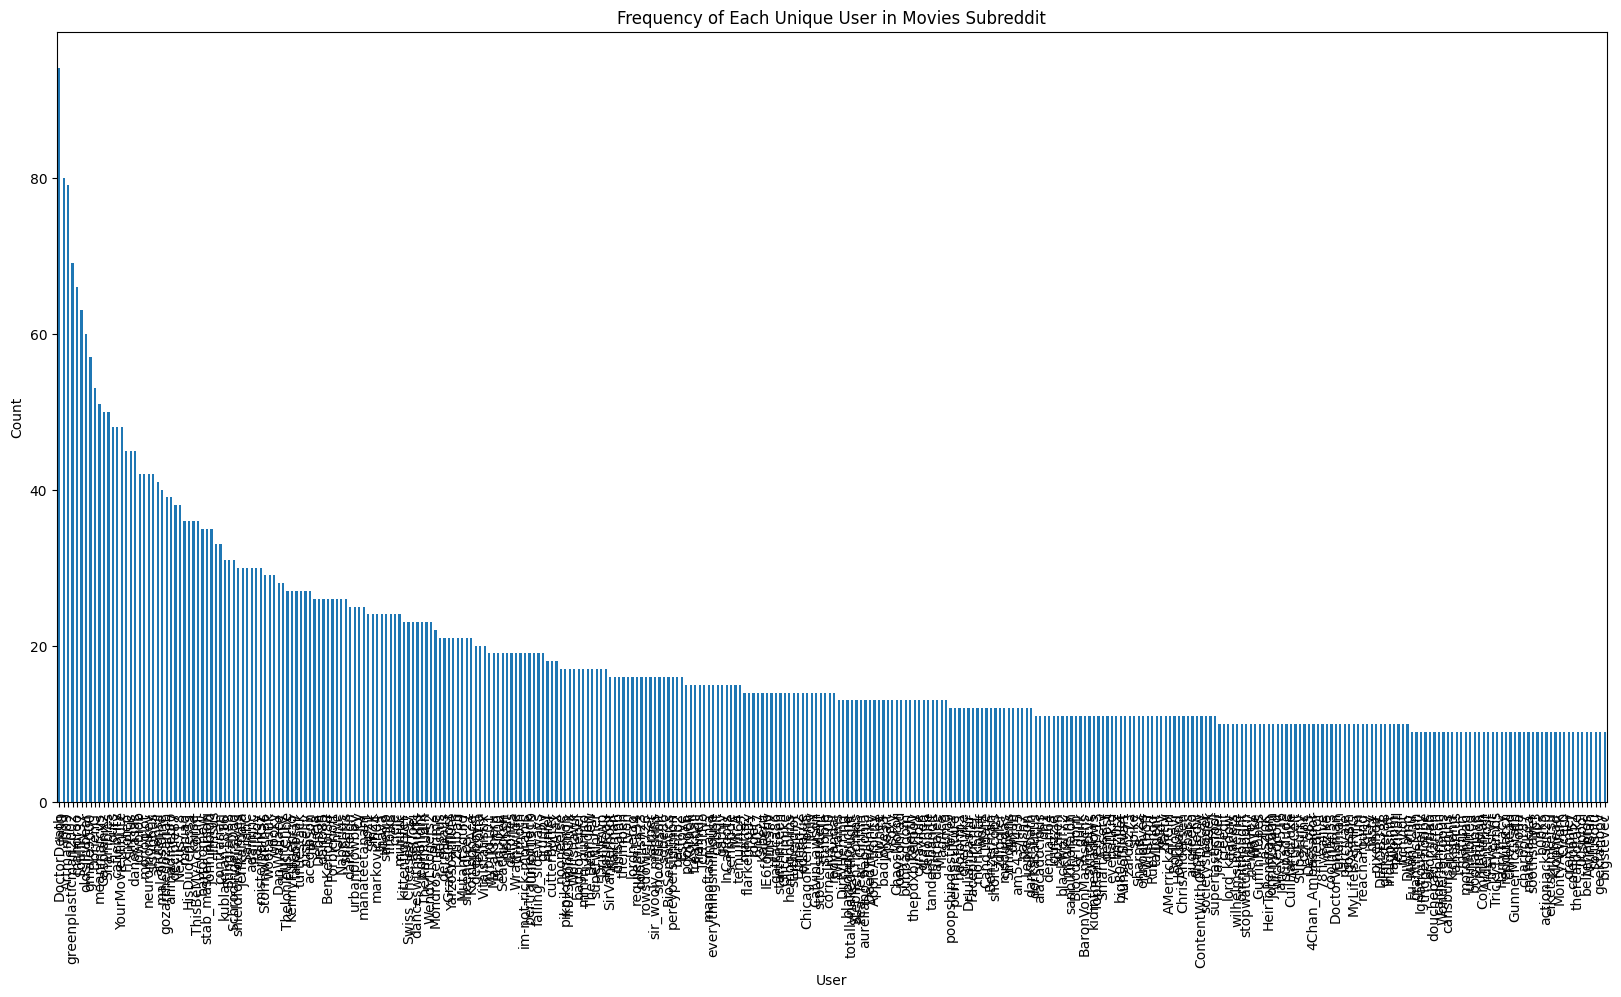

In [27]:
# Filter the dataframe for rows where subreddit is "movies"
movies_df = metadata[metadata['subreddit'] == 'movies']

# Get the frequency counts of each unique user
user_counts = movies_df['author'].value_counts()

# Keep only the top users based on counts
top_users = user_counts[user_counts >= user_counts.quantile(0.90)]

top_users.plot(kind='bar', figsize=(20, 10))
plt.xlabel('User')
plt.ylabel('Count')
plt.title('Frequency of Each Unique User in Movies Subreddit')
plt.show()

In [29]:
embeddings = utils.load_embeddings(2010, 1, embed_path=g['embed_path'])
embeddings = embeddings[movies_df['idx']]
embeddings.shape

(13303, 384)

In [16]:
soi = 'movies'

metadata = ['id', 'name', 'created_utc', 'parent_id', 
            'subreddit', 'subreddit_id', 'author']

reader = utils.read_file(
    os.path.join(DATA_PATH, 'RC_2010-01.bz2'), 
    return_type='metadata',
    metadata=metadata, 
    chunk_size=10000
)

res = []

# k will keep track of line and should align with embeddings
k = 0
for chunk in reader:
    for entry in chunk:
        if entry['subreddit'] == soi:
            entry['idx'] = k
            res.append(entry)
        k += 1

In [17]:
df_res = pd.DataFrame(res)
df_res.head()

,id,name,created_utc,parent_id,subreddit,subreddit_id,author,idx
0,c0i12y9,t1_c0i12y9,1262304136,t3_akd1b,movies,t5_2qh3s,bbittner,69
1,c0i12yf,t1_c0i12yf,1262304145,t1_c0i0xg6,movies,t5_2qh3s,passingby,75
2,c0i136p,t1_c0i136p,1262304464,t3_akc13,movies,t5_2qh3s,andhelostthem,293
3,c0i13at,t1_c0i13at,1262304618,t1_c0i0y0u,movies,t5_2qh3s,Wrathwilde,411
4,c0i13mq,t1_c0i13mq,1262305018,t3_akd1b,movies,t5_2qh3s,rawbinm,752


In [23]:
embeddings = utils.load_embeddings(2010, 1)

# grab just within subreddit
idx = df_res['idx'].values
embeddings = embeddings[idx]

In [24]:
embeddings.shape

(13303, 384)